In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#BEGIN DATA CLEANUP========================================
cancer_df = pd.read_csv("../data/cervical_cancer.csv")

In [3]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# unanswered questions are filled in with a "?", so we need to replace with NaN and turn object into numeric type
cancer_nan = cancer_df.replace('?', np.nan)

In [5]:
#numeric_df = cancer_nan.astype('float64') the problem with this is that everything is converted to floats
#just want to convert object columns to numeric
numeric_df = cancer_nan.convert_objects(convert_numeric=True)

In [6]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [7]:
#check NaN counts
numeric_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [8]:
# Fill in  NAN values with mean, as done by authors of paper who collected data

numeric_df['Number of sexual partners'] = numeric_df['Number of sexual partners'].fillna(numeric_df['Number of sexual partners'].mean())
numeric_df['Number of sexual partners'] = numeric_df['Number of sexual partners'].round(decimals=0)
numeric_df['First sexual intercourse'] = numeric_df['First sexual intercourse'].fillna(numeric_df['First sexual intercourse'].mean())
numeric_df['Num of pregnancies'] = numeric_df['Num of pregnancies'].fillna(numeric_df['Num of pregnancies'].mean())
numeric_df['Num of pregnancies'] = numeric_df['Num of pregnancies'].round(decimals=0)


In [9]:
#determine how to fill in Smokes values -- what is most common answer?
# there are 13 missing values for smokes/smokesyears/smokes packs - all same patients 
#potentially the are non-smokers who left the columns blank because did not apply to them
numeric_df["Smokes"].value_counts()

0.0    722
1.0    123
Name: Smokes, dtype: int64

In [10]:
# if setting smokes = 0 for missing data points, then smokes(years) and packs/year should be set to zero
numeric_df['Smokes'] = numeric_df['Smokes'].fillna(0)
numeric_df['Smokes (years)'] = numeric_df['Smokes (years)'].fillna(0)
numeric_df['Smokes (packs/year)'] = numeric_df['Smokes (packs/year)'].fillna(0)

In [11]:
numeric_df["Hormonal Contraceptives"].value_counts()

1.0    481
0.0    269
Name: Hormonal Contraceptives, dtype: int64

In [12]:
numeric_df['Hormonal Contraceptives'] = numeric_df['Hormonal Contraceptives'].fillna(0)
numeric_df['Hormonal Contraceptives (years)'] = numeric_df['Hormonal Contraceptives (years)'].fillna(numeric_df['Hormonal Contraceptives (years)'].mean())


In [13]:
numeric_df["IUD"].value_counts()

0.0    658
1.0     83
Name: IUD, dtype: int64

In [14]:
numeric_df['IUD'] = numeric_df['IUD'].fillna(0)
numeric_df['IUD (years)'] = numeric_df['IUD (years)'].fillna(0) 

In [15]:
numeric_df["STDs"].value_counts()

0.0    674
1.0     79
Name: STDs, dtype: int64

In [16]:
numeric_df['STDs'] = numeric_df['STDs'].fillna(0)
numeric_df['STDs (number)'] = numeric_df['STDs (number)'].fillna(0)

In [17]:
numeric_df['STDs:condylomatosis'].value_counts()

0.0    709
1.0     44
Name: STDs:condylomatosis, dtype: int64

In [18]:
numeric_df['STDs:condylomatosis'] = numeric_df['STDs:condylomatosis'].fillna(0)

In [19]:
numeric_df['STDs:cervical condylomatosis'].value_counts()

0.0    753
Name: STDs:cervical condylomatosis, dtype: int64

In [20]:
numeric_df['STDs:cervical condylomatosis'] = numeric_df['STDs:cervical condylomatosis'].fillna(0)

In [21]:
numeric_df['STDs:vaginal condylomatosis'] = numeric_df['STDs:vaginal condylomatosis'].fillna(0)
numeric_df['STDs:vulvo-perineal condylomatosis'] = numeric_df['STDs:vulvo-perineal condylomatosis'].fillna(0)
numeric_df['STDs:syphilis'] = numeric_df['STDs:syphilis'].fillna(0)
numeric_df['STDs:pelvic inflammatory disease'] = numeric_df['STDs:pelvic inflammatory disease'].fillna(0)
numeric_df['STDs:genital herpes'] = numeric_df['STDs:genital herpes'].fillna(0)
numeric_df['STDs:molluscum contagiosum'] = numeric_df['STDs:molluscum contagiosum'].fillna(0)
numeric_df['STDs:AIDS'] = numeric_df['STDs:AIDS'].fillna(0)
numeric_df['STDs:HIV'] = numeric_df['STDs:HIV'].fillna(0)
numeric_df['STDs:Hepatitis B'] = numeric_df['STDs:Hepatitis B'].fillna(0)
numeric_df['STDs:HPV'] = numeric_df['STDs:HPV'].fillna(0)


In [22]:
## I will fill in mean values for now for consistency, but i think we should just drop these columns all together because 
# it seems like no one really answered them --
numeric_df['STDs: Time since first diagnosis'] = numeric_df['STDs: Time since first diagnosis'].fillna(numeric_df['STDs: Time since first diagnosis'].mean())
numeric_df['STDs: Time since last diagnosis'] = numeric_df['STDs: Time since last diagnosis'].fillna(numeric_df['STDs: Time since last diagnosis'].mean())


In [23]:
# verify that there are no nulls left in the dataframe --

numeric_df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [24]:
numeric_df.to_csv("../data/clean_df_v1.csv")
#End Data Cleaning
#=======================================

In [25]:
# FIRST VERSION OF OUR MODEL. IN HINDSIGHT, X CONTAINS SEVERAL TARGET VARIABLES WHICH IS WHY ACCURACY IS SO HIGH =====

X = numeric_df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Smokes (years)", "Smokes (packs/year)", "Hormonal Contraceptives", "Hormonal Contraceptives (years)", "IUD",\
                "IUD (years)", "STDs", "STDs (number)", "STDs:condylomatosis",\
               "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis", "STDs:vulvo-perineal condylomatosis", "STDs:syphilis", "STDs:pelvic inflammatory disease", "STDs:genital herpes", "STDs:molluscum contagiosum",\
                "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV", "STDs: Number of diagnosis", "STDs: Time since first diagnosis", "STDs: Time since last diagnosis", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller", "Citology"]]

y = numeric_df['Biopsy'].values.reshape(-1, 1)


In [26]:
#split dataset randomly into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [27]:
# normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)

In [28]:
X_train_scaled.shape

(643, 35)

In [29]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [30]:
from keras.layers import Dense
number_inputs = 35
number_hidden_nodes = 4
#input layer
model.add(Dense(units=number_hidden_nodes, kernel_initializer='uniform', activation='relu', input_dim=number_inputs))

#hidden layer
model.add(Dense(units=4, kernel_initializer='uniform', activation ='relu'))

# Here we depart from the recommendation of instructors and use SIGMOID activation function instead of SOFTMAX. My reasoning for this
# is that the sigmoid function should be used for binary classification. Reference: https://medium.com/aidevnepal/for-sigmoid-funcion-f7a5da78fec2
# if we run the output layer w softmax, we get a model accuracy of 5%

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [32]:
# using binary crossentropy because our target variable is binary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
## Fit/train the model

model.fit(x=X_train_scaled, y=y_train, epochs=20, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 0s - loss: 0.6927 - acc: 0.6625
Epoch 2/20
 - 0s - loss: 0.6910 - acc: 0.9331
Epoch 3/20
 - 0s - loss: 0.6892 - acc: 0.9331
Epoch 4/20
 - 0s - loss: 0.6874 - acc: 0.9331
Epoch 5/20
 - 0s - loss: 0.6855 - acc: 0.9331
Epoch 6/20
 - 0s - loss: 0.6837 - acc: 0.9331
Epoch 7/20
 - 0s - loss: 0.6818 - acc: 0.9331
Epoch 8/20
 - 0s - loss: 0.6798 - acc: 0.9331
Epoch 9/20
 - 0s - loss: 0.6778 - acc: 0.9331
Epoch 10/20
 - 0s - loss: 0.6757 - acc: 0.9331
Epoch 11/20
 - 0s - loss: 0.6735 - acc: 0.9331
Epoch 12/20
 - 0s - loss: 0.6713 - acc: 0.9331
Epoch 13/20
 - 0s - loss: 0.6689 - acc: 0.9331
Epoch 14/20
 - 0s - loss: 0.6665 - acc: 0.9331
Epoch 15/20
 - 0s - loss: 0.6640 - acc: 0.9331
Epoch 16/20
 - 0s - loss: 0.6613 - acc: 0.9331
Epoch 17/20
 - 0s - loss: 0.6585 - acc: 0.9331
Epoch 18/20
 - 0s - loss: 0.6556 - acc: 0.9331
Epoch 19/20
 - 0s - loss: 0.6525 - acc: 0.9331
Epoch 20/20
 - 0s - loss: 0.6492 - acc: 0.9331


In [34]:
#quantify the model

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=200, verbose=2)

In [35]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6448021905366764, Accuracy: 0.9441860442937806


In [36]:
# After reading the scientific paper that utilized this data, we realized that Hinselmann, Schiller, Citology, and Biopsy are ALL target variables 
# These are all tests used to determine if a patient is at risk of cervical cancer. If any of these tests detect an irregularity, a 1 is placed in the column. If no irregularity, 0.
# Thus, we create a function that returns a 1 if any of these tests come up positive/ detect an irregularity 
# if none of these tests detect an irregularity, function will return zero.

def cervical_risk(row):
    if row["Hinselmann"] or row["Schiller"] or row["Citology"] or row["Biopsy"] == 1:
        return 1
    else:
        return 0



In [37]:
#apply the function to the dataframe
numeric_df.apply(cervical_risk, axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
828    0
829    0
830    0
831    0
832    0
833    0
834    0
835    0
836    0
837    0
838    0
839    0
840    0
841    0
842    0
843    0
844    0
845    0
846    0
847    0
848    0
849    0
850    0
851    0
852    0
853    0
854    0
855    1
856    0
857    0
Length: 858, dtype: int64

In [38]:
#add new cervical_risk column to df using function. this will be our new target variable.
numeric_df["cervical_risk"] = numeric_df.apply(cervical_risk, axis=1)

In [39]:
# make sure this actually works!
numeric_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cervical_risk
0,18,4.0,15.0000,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,5.816901,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0000,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0000,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,5.816901,0,0,0,0,1,1,0,1,1
7,26,1.0,26.0000,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,5.816901,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0000,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,1,0,1,1,0,0,0,0,0
9,44,3.0,15.0000,2.0,1.0,1.266973,2.80,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0


In [40]:
#it worked! save.
numeric_df.to_csv("../data/clean_v2_cervicalrisk.csv")


In [41]:
#make a new model without target variables in X and with new target variable in y

#================================================NEW MODEL============================================
X = numeric_df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Smokes (years)", "Smokes (packs/year)", "Hormonal Contraceptives", "Hormonal Contraceptives (years)", "IUD",\
                "IUD (years)", "STDs", "STDs (number)", "STDs:condylomatosis",\
               "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis", "STDs:vulvo-perineal condylomatosis", "STDs:syphilis", "STDs:pelvic inflammatory disease", "STDs:genital herpes", "STDs:molluscum contagiosum",\
                "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV", "STDs: Number of diagnosis", "STDs: Time since first diagnosis", "STDs: Time since last diagnosis", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx"]]

y = numeric_df['cervical_risk'].values.reshape(-1, 1)

In [42]:
#split dataset randomly into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)

In [44]:
from keras.models import Sequential

model = Sequential()

In [45]:
from keras.layers import Dense
number_inputs = 32
#number_hidden_nodes = 4
#input layer
model.add(Dense(units=500, kernel_initializer='uniform', activation='relu', input_dim=number_inputs))

#hidden layer
model.add(Dense(units=200, kernel_initializer='uniform', activation ='relu'))
model.add(Dense(units=100, kernel_initializer='uniform', activation ='relu'))

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(x=X_train_scaled, y=y_train, epochs=70, batch_size=200, verbose=2)

Epoch 1/70
 - 0s - loss: 0.6901 - acc: 0.8771
Epoch 2/70
 - 0s - loss: 0.6704 - acc: 0.8771
Epoch 3/70
 - 0s - loss: 0.6185 - acc: 0.8771
Epoch 4/70
 - 0s - loss: 0.5207 - acc: 0.8771
Epoch 5/70
 - 0s - loss: 0.4223 - acc: 0.8771
Epoch 6/70
 - 0s - loss: 0.4248 - acc: 0.8771
Epoch 7/70
 - 0s - loss: 0.4163 - acc: 0.8771
Epoch 8/70
 - 0s - loss: 0.3844 - acc: 0.8771
Epoch 9/70
 - 0s - loss: 0.3757 - acc: 0.8771
Epoch 10/70
 - 0s - loss: 0.3683 - acc: 0.8771
Epoch 11/70
 - 0s - loss: 0.3593 - acc: 0.8771
Epoch 12/70
 - 0s - loss: 0.3551 - acc: 0.8771
Epoch 13/70
 - 0s - loss: 0.3505 - acc: 0.8771
Epoch 14/70
 - 0s - loss: 0.3469 - acc: 0.8771
Epoch 15/70
 - 0s - loss: 0.3456 - acc: 0.8771
Epoch 16/70
 - 0s - loss: 0.3471 - acc: 0.8771
Epoch 17/70
 - 0s - loss: 0.3462 - acc: 0.8771
Epoch 18/70
 - 0s - loss: 0.3418 - acc: 0.8771
Epoch 19/70
 - 0s - loss: 0.3420 - acc: 0.8771
Epoch 20/70
 - 0s - loss: 0.3411 - acc: 0.8771
Epoch 21/70
 - 0s - loss: 0.3407 - acc: 0.8771
Epoch 22/70
 - 0s - lo

In [48]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=200, verbose=2)

In [49]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3729080258067264, Accuracy: 0.8883720885875613


In [50]:
# we may want to eliminate some columns -- too much info may bog down the model

######===================================================

## which variables are correlated with each other, which variables are correlated with diagnosis

import seaborn as sns

In [51]:
corrmat = numeric_df.corr()

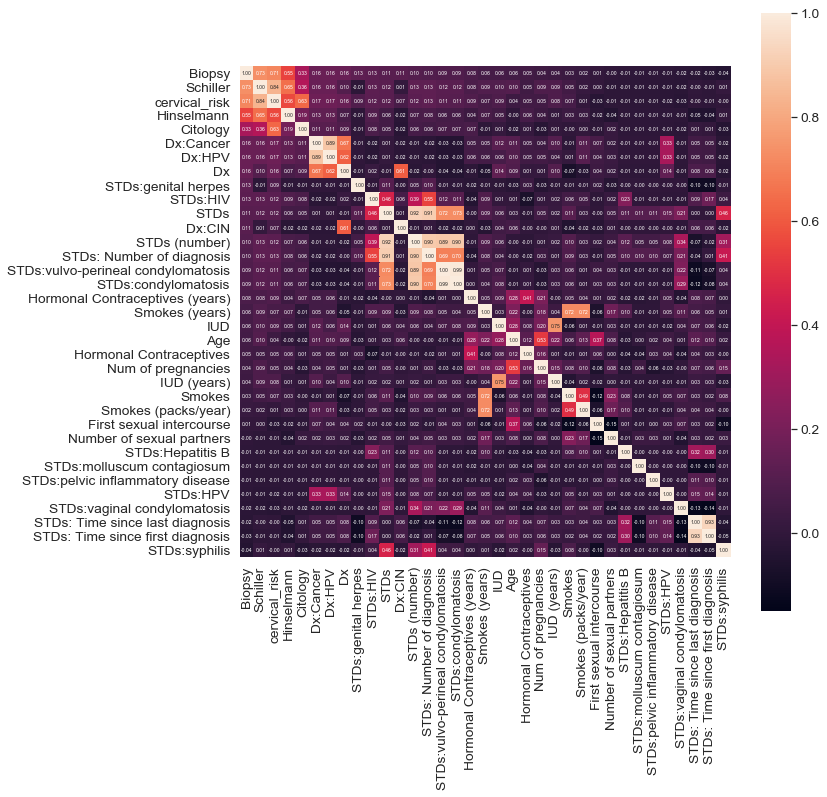

In [52]:
k = 37
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(numeric_df[cols].values.T)

plt.figure(figsize=(11,11))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5},
                yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [53]:
df_reduced= numeric_df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "cervical_risk"]]

In [54]:
df_reduced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,cervical_risk
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,1.0,0.0,0.0,1,0,1,0,0
4,46,3.0,21.0000,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0000,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0000,6.0,1.0,0.0,1.0,0.0,0,0,0,0,1
7,26,1.0,26.0000,3.0,0.0,1.0,1.0,0.0,0,0,0,0,0
8,45,1.0,20.0000,5.0,0.0,0.0,0.0,0.0,1,0,1,1,0
9,44,3.0,15.0000,2.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [55]:
df_reduced.to_csv("../data/clean_v3_reduced.csv")

In [56]:
## make model from df_reduced

X = df_reduced[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx"]]
y = df_reduced['cervical_risk'].values.reshape(-1, 1)

In [57]:
#split dataset randomly into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
# normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)

In [59]:
from keras.models import Sequential

model = Sequential()

In [60]:
from keras.layers import Dense
number_inputs = 12
number_hidden_nodes = 4
#input layer
model.add(Dense(units=number_hidden_nodes, kernel_initializer='uniform', activation='relu', input_dim=number_inputs))

#hidden layer
model.add(Dense(units=4, kernel_initializer='uniform', activation ='relu'))

# Here we depart from the recommendation of instructors and use SIGMOID activation function instead of SOFTMAX. My reasoning for this
# is that the sigmoid function should be used for binary classification. Reference: https://medium.com/aidevnepal/for-sigmoid-funcion-f7a5da78fec2

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [62]:
#using binary crossentropy because our target variable is binary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
## Fit/train the model

model.fit(x=X_train_scaled, y=y_train, epochs=20, verbose=2)

Epoch 1/20
 - 0s - loss: 0.6894 - acc: 0.8367
Epoch 2/20
 - 0s - loss: 0.6808 - acc: 0.8771
Epoch 3/20
 - 0s - loss: 0.6709 - acc: 0.8771
Epoch 4/20
 - 0s - loss: 0.6571 - acc: 0.8771
Epoch 5/20
 - 0s - loss: 0.6355 - acc: 0.8771
Epoch 6/20
 - 0s - loss: 0.6006 - acc: 0.8771
Epoch 7/20
 - 0s - loss: 0.5560 - acc: 0.8771
Epoch 8/20
 - 0s - loss: 0.5066 - acc: 0.8771
Epoch 9/20
 - 0s - loss: 0.4603 - acc: 0.8771
Epoch 10/20
 - 0s - loss: 0.4250 - acc: 0.8771
Epoch 11/20
 - 0s - loss: 0.4037 - acc: 0.8771
Epoch 12/20
 - 0s - loss: 0.3936 - acc: 0.8771
Epoch 13/20
 - 0s - loss: 0.3895 - acc: 0.8771
Epoch 14/20
 - 0s - loss: 0.3875 - acc: 0.8771
Epoch 15/20
 - 0s - loss: 0.3854 - acc: 0.8771
Epoch 16/20
 - 0s - loss: 0.3838 - acc: 0.8771
Epoch 17/20
 - 0s - loss: 0.3823 - acc: 0.8771
Epoch 18/20
 - 0s - loss: 0.3811 - acc: 0.8771
Epoch 19/20
 - 0s - loss: 0.3806 - acc: 0.8771
Epoch 20/20
 - 0s - loss: 0.3794 - acc: 0.8771


In [64]:
#quantify the model

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=200, verbose=2)

In [65]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3543116443378981, Accuracy: 0.8930232469425645


In [66]:
#there seems to be no difference in the accuracy of the models that use reduced dataset and the full dataset.


In [67]:
#==== build same model as above but will try to improve accuracy by adding epochs and hidden layers === 

X = df_reduced[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx"]]
y = df_reduced['cervical_risk'].values.reshape(-1, 1)

In [68]:
#split dataset randomly into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
# normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)

In [70]:
from keras.models import Sequential

model = Sequential()

In [71]:
from keras.layers import Dense
number_inputs = 12
#number_hidden_nodes = 4
#input layer
model.add(Dense(units=600, kernel_initializer='uniform', activation='relu', input_dim=number_inputs))

#hidden layers
model.add(Dense(units=300, kernel_initializer='uniform', activation ='relu'))
model.add(Dense(units=150, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(units=75, kernel_initializer='uniform', activation = 'relu'))

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 600)               7800      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_13 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_14 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 76        
Total params: 244,651
Trainable params: 244,651
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
# train model

model.fit(x=X_train_scaled, y=y_train, epochs=60, verbose=2)

Epoch 1/60
 - 1s - loss: 0.6041 - acc: 0.8445
Epoch 2/60
 - 0s - loss: 0.4254 - acc: 0.8771
Epoch 3/60
 - 0s - loss: 0.3807 - acc: 0.8771
Epoch 4/60
 - 0s - loss: 0.3681 - acc: 0.8771
Epoch 5/60
 - 0s - loss: 0.3634 - acc: 0.8771
Epoch 6/60
 - 0s - loss: 0.3664 - acc: 0.8771
Epoch 7/60
 - 0s - loss: 0.3590 - acc: 0.8771
Epoch 8/60
 - 0s - loss: 0.3642 - acc: 0.8771
Epoch 9/60
 - 0s - loss: 0.3550 - acc: 0.8771
Epoch 10/60
 - 0s - loss: 0.3584 - acc: 0.8771
Epoch 11/60
 - 0s - loss: 0.3567 - acc: 0.8818
Epoch 12/60
 - 0s - loss: 0.3575 - acc: 0.8802
Epoch 13/60
 - 0s - loss: 0.3637 - acc: 0.8818
Epoch 14/60
 - 0s - loss: 0.3683 - acc: 0.8849
Epoch 15/60
 - 0s - loss: 0.3533 - acc: 0.8818
Epoch 16/60
 - 0s - loss: 0.3552 - acc: 0.8834
Epoch 17/60
 - 0s - loss: 0.3470 - acc: 0.8834
Epoch 18/60
 - 0s - loss: 0.3529 - acc: 0.8834
Epoch 19/60
 - 0s - loss: 0.3478 - acc: 0.8818
Epoch 20/60
 - 0s - loss: 0.3449 - acc: 0.8834
Epoch 21/60
 - 0s - loss: 0.3462 - acc: 0.8865
Epoch 22/60
 - 0s - lo

In [75]:
#quantify the model

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=200, verbose=2)

In [76]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3964886435762394, Accuracy: 0.9023255636525709
